## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are here : https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz

Download it into the data directory : 

```
wget https://cloud.teklia.com/index.php/s/isNwnwA7a7AWst6/download/LeMonde2003_9classes.csv.gz
```

Or you can download the file directly from the URL in pandas with `pd.read_csv(url)`.`

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `LeMonde2003_9classes.csv.gz` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt` or from the URL https://cloud.teklia.com/index.php/s/3mwZfSre4PmJcdb/download/stop_word_fr.txt



In [1]:
import pandas as pd

# load dataframe from CSV file
data = pd.read_csv("data/LeMonde2003_9classes.csv.gz")

In [2]:
print(f'There are {len(data)} articles.')

There are 30165 articles.


In [3]:
data.head(5)

,text,category
0,a la boutique du fulham fc nichée au dernier é...,SPO
1,pour la plupart de ceux qui n'y vivent pas la ...,ART
2,la perspective d'une enquête judiciaire sur la...,FRA
3,le tribunal administratif de limoges a annulé ...,SOC
4,des avions américains et britanniques ont bomb...,INT


In [4]:
data["category"].value_counts()

category
INT    7328
ENT    6251
ART    4552
SOC    3755
FRA    3616
SPO    2608
UNE    2055
Name: count, dtype: int64

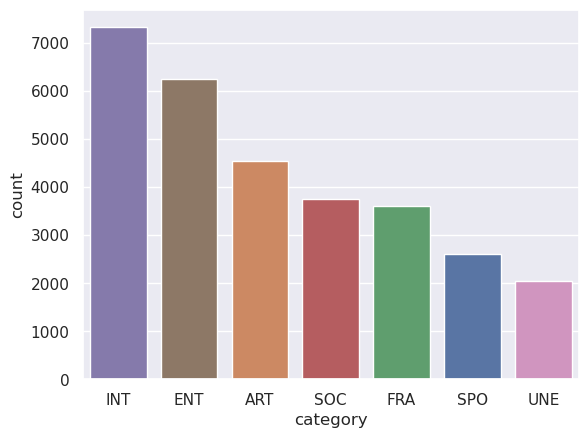

In [5]:
import seaborn as sns
%matplotlib inline

# Plot the statistics of category
sns.set(style='darkgrid')
ax = sns.countplot(data=data, x='category', order=data['category'].value_counts().index, hue='category')

In [8]:
# Print examples of the articles
pd.set_option('display.max_colwidth', None)
data.sample(5)

text  \
19582                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [11]:
# par catégorie
data.groupby('category').sample(1)

text  \
16534                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

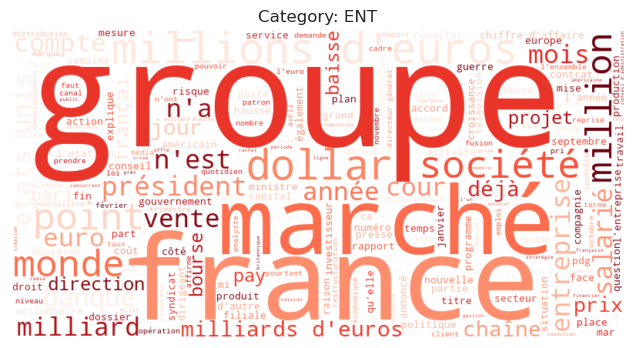

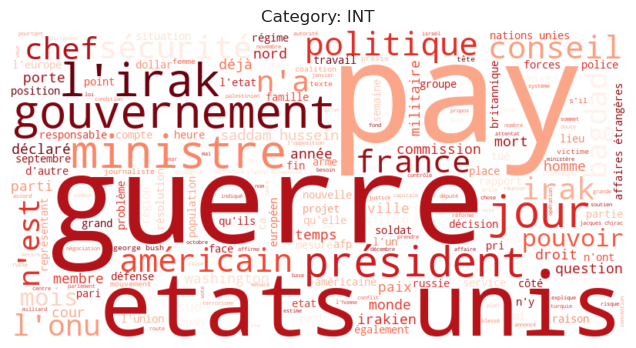

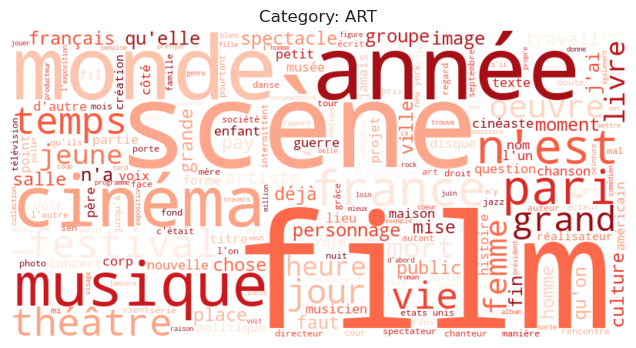

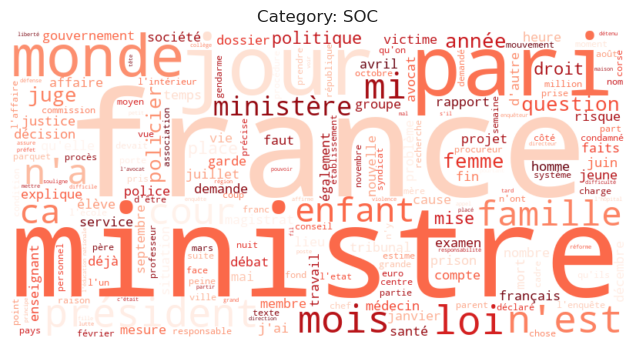

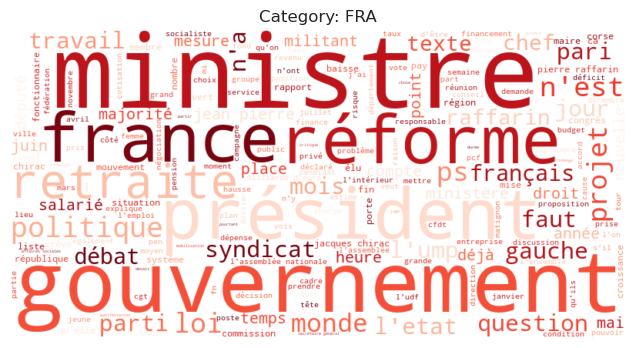

In [6]:
# Display one wordcloud for each of the most frequent classes
import matplotlib.pyplot as plt
from wordcloud import WordCloud

STOPWORDS = [x.strip() for x in open('data/stop_word_fr.txt').readlines()]

# plot a word cloud for each category
for cat in ['ENT', 'INT',  'ART', 'SOC', 'FRA']:
    texts = data[data['category'] == cat]['text']
    
    art = " ".join(texts)
    
    words = WordCloud(stopwords=STOPWORDS, width=800, height=400, colormap="Reds", background_color='white').generate(art)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(words, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Category: {cat}")
    plt.show()

## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 200  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=200)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (80%), dev set (10%)  and test set (10%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 1000 most frequent words. 
> * Train a naive bayes classifier on the data. 
> * Evaluate the classification accuracy on the train, dev and test sets using the [score](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB.score) method. 

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.


In [9]:
from sklearn.model_selection import train_test_split
# Split the dataset, create X (features) and y (target), print the size
X = data["text"]
y = data["category"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')
print(f'Dev size: {len(X_dev)}')

Train size: 24132
Test size: 3017
Dev size: 3016


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
# Create document vectors
# YOUR CODE HERE
# create the vectorizer object
vectorizer = CountVectorizer(max_features=1000)

# fit on train data
vectorizer.fit(X_train)

CountVectorizer(max_features=1000)

In [12]:
# apply it on train and dev data
X_train_counts = vectorizer.transform(X_train)
X_dev_counts = vectorizer.transform(X_dev)

In [13]:
from sklearn.naive_bayes import MultinomialNB
# train a Naive Bayes classifier
# YOUR CODE HERE
# create the MultinomialNB
clf = MultinomialNB()

# Train 
clf.fit(X_train_counts, y_train)

# Evaluate 
train_acc = clf.score(X_train_counts, y_train)
dev_acc = clf.score(X_dev_counts, y_dev)

print(f"Train Set Accuracy: {train_acc:.4f}")
print(f"Dev Set Accuracy: {dev_acc:.4f}")

Train Set Accuracy: 0.7285
Dev Set Accuracy: 0.7142


In [14]:
#test
X_test_counts = vectorizer.transform(X_test)
test_acc = clf.score(X_test_counts, y_test)
print(f"Test Set Accuracy: {test_acc:.4f}")

Test Set Accuracy: 0.7305


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer
# YOUR CODE HERE

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_dev_tf = tf_transformer.transform(X_dev_counts)

# train a Naive Bayes classifier
clf = MultinomialNB()

# Train 
clf.fit(X_train_tf, y_train)

# Evaluate 
train_acc = clf.score(X_train_tf, y_train)
dev_acc = clf.score(X_dev_tf, y_dev)

print(f"Train Set Accuracy: {train_acc:.4f}")
print(f"Dev Set Accuracy: {dev_acc:.4f}")

Train Set Accuracy: 0.7439
Dev Set Accuracy: 0.7314


In [16]:
# test
X_test_tf = tf_transformer.transform(X_test_counts)
test_acc = clf.score(X_test_tf, y_test)
print(f"Test Set Accuracy: {test_acc:.4f}")

Test Set Accuracy: 0.7458


In [17]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_tf)
error_rate = 1 - accuracy_score(y_test, y_pred)

print(f'Test Error Rate: {error_rate:.4f}')

Test Error Rate: 0.2542


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# YOUR CODE HERE
# classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         ART       0.75      0.86      0.80       466
         ENT       0.75      0.86      0.80       598
         FRA       0.66      0.65      0.66       357
         INT       0.75      0.89      0.81       750
         SOC       0.68      0.61      0.64       364
         SPO       0.95      0.75      0.84       278
         UNE       0.00      0.00      0.00       204

    accuracy                           0.75      3017
   macro avg       0.65      0.66      0.65      3017
weighted avg       0.70      0.75      0.72      3017



Classes with the highest values in precision, recall, and f1-score are the ones with the best scores, such as Sport, International, Art, and Entreprise. It corresponds to classes that have more articles, so the model has more data to learn from. Whereas, classes with fewer articles have worse scores because the model has fewer examples to learn from and generalize.

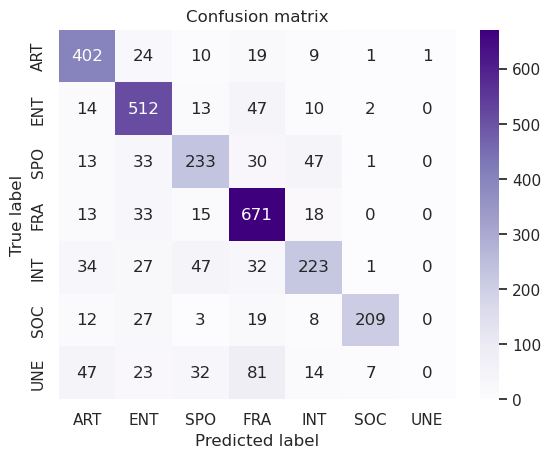

In [45]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

The most confused classes are SOC (Société) and FRA (France) due to overlapping themes, and UNE, which the model never predicts correctly, likely due to class imbalance.

## Data re-configuration
After the error analysis, we came to the conclusion that one of the class can not be distinguised from the others. There is no use trying to solve an impossible problem.

**Questions**:

> * Remove the class `UNE` from the original dataset and merge the semantically close classes 'FRANCE' and 'SOCIETE'
> * Plot the class statitics with seaborn
> * Create new splits
> * Retrain a NaiveBayes classifier using [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) with the 1000 most frequent words.

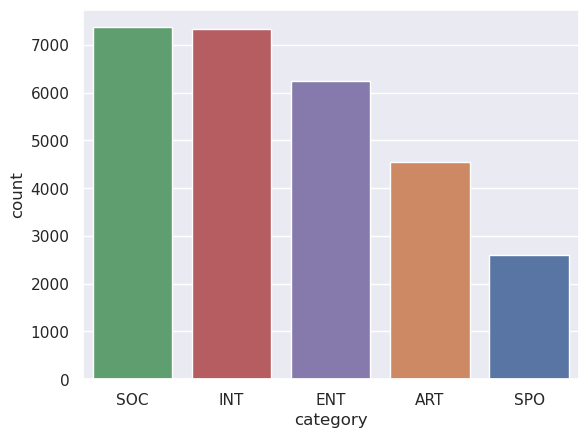

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# YOUR CODE HERE

# Filter out the UNE class
data_reconfig = data.copy()
data_reconfig = data_reconfig[data_reconfig["category"] != "UNE"]
data_reconfig.loc[data_reconfig['category'].isin(['FRA', 'SOC']), 'category'] = 'SOC'

# Plot the statistics of classes
sns.set(style='darkgrid')
ax = sns.countplot(data=data_reconfig, x='category', order=data_reconfig['category'].value_counts().index, hue='category')

In [57]:
# Make the splits and print the sizes for checking
X = data_reconfig["text"]
y = data_reconfig["category"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train size: {len(X_train)}')
print(f'Test size: {len(X_test)}')
print(f'Dev size: {len(X_dev)}')

Train size: 22488
Test size: 2811
Dev size: 2811


In [59]:
# Apply TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

X_train_tf = vectorizer.fit_transform(X_train)
X_dev_tf = vectorizer.transform(X_dev)
X_test_tf = vectorizer.transform(X_test)

In [60]:
# Train MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf, y_train)

# Print accuracy
train_acc = clf.score(X_train_tf, y_train)
dev_acc = clf.score(X_dev_tf, y_dev)
test_acc = clf.score(X_test_tf, y_test)

print(f"Train Set Accuracy: {train_acc:.4f}")
print(f"Dev Set Accuracy: {dev_acc:.4f}")
print(f"Test Set Accuracy: {test_acc:.4f}")

Train Set Accuracy: 0.8368
Dev Set Accuracy: 0.8264
Test Set Accuracy: 0.8353


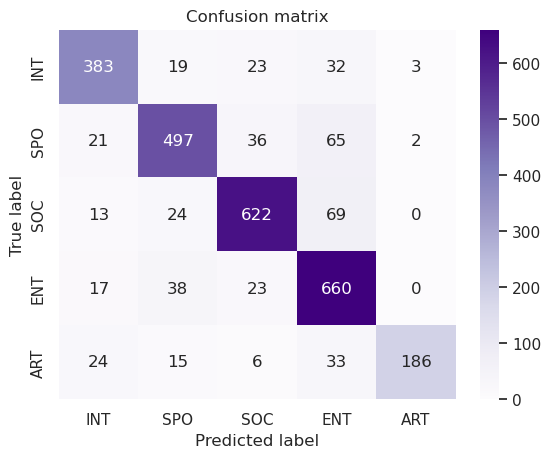

In [61]:
# Print confusion matrix
y_pred = clf.predict(X_test_tf)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## What about the LLMs?

**You must write the answer to this question in a notebook hosted in your github account and give access to your supervisor.**

LLMs are reputed to have revolutionised automatic language processing. Since the introduction of BERT-type models, all language processing applications have been based on LLMs, of varying degrees of sophistication and size. These models are trained on multiple tasks and are therefore capable of performing new tasks without learning, simply from a prompt. This is known as "zero-shot learning" because there is no learning phase as such. We are going to test these models on our classification task.

Huggingface is a Franco-American company that develops tools for building applications based on Deep Learning. In particular, it hosts the huggingface.co portal, which contains numerous Deep Learning models. These models can be used very easily thanks to the [Transformer] library (https://huggingface.co/docs/transformers/quicktour) developed by HuggingFace.

Using a transform model in zero-shot learning with HuggingFace is very simple: [see documentation](https://huggingface.co/tasks/zero-shot-classification)

However, you need to choose a suitable model from the list of models compatible with Zero-Shot classification. HuggingFace offers [numerous models](https://huggingface.co/models?pipeline_tag=zero-shot-classification). 

The classes proposed to the model must also provide sufficient semantic information for the model to understand them.

**Question**:

* Write a code to classify an example of text from an article in Le Monde using a model transformed using zero-sot learning with the HuggingFace library.
* choose a model and explain your choice
* choose a formulation for the classes to be predicted
* show that the model predicts a class for the text of the article (correct or incorrect, analyse the results)
* evaluate the performance of your model on 100 articles (a test set).
* note model sizes, processing times and classification results


Notes :
* make sure that you use the correct Tokenizer when using a model 
* start testing with a small number of articles and the first 100's of characters for faster experiments.

In [39]:
data.sample(1)

,text,category
25862,le constructeur aéronautique européen devait annoncer mercredi 18 juin un contrat de six à huit appareils gros porteurs avec la compagnie korean airways cette commande devrait inclure le nouvel avion géant de 550 places d'airbus l'a-380,ENT


In [6]:
from transformers import pipeline

classifier = pipeline(task="zero-shot-classification",
                      model="symanto/xlm-roberta-base-snli-mnli-anli-xnli",
                      tokenizer="symanto/xlm-roberta-base-snli-mnli-anli-xnli")

#text = "l'indicateur s'affiche en baisse de 1,7 en décembre par rapport à novembre le repli est particulièrement sensible sur les biens de consommation -3,7 et la construction -2,3 sur un an l'indice de production industrielle reste en progression de 0,5	"
#text = "des soldats sud-coréens et nord-coréens ont échangé des tirs de part et d'autre de la zone démilitarisée qui sépare les deux parties de la péninsule ont annoncé jeudi 18 juillet les autorités militaires sud-coréennes selon séoul les nord-coréens ont tiré quatre salves de mitraillette et ses soldats ont répondu par dix-sept salves le dernier incident terrestre entre les deux corées remontait au 27 novembre 2001 date à laquelle les deux pays avaient brièvement échangé des tirs afp reuters"
text = data.iloc[25862]["text"]

candidate_labels = ['entreprises', 'international', 'art', 'communauté', 'France', 'sport', 'actualité']

classifier(text, candidate_labels)

/opt/conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


{'sequence': "le constructeur aéronautique européen devait annoncer mercredi 18 juin un contrat de six à huit appareils gros porteurs avec la compagnie korean airways cette commande devrait inclure le nouvel avion géant de 550 places d'airbus l'a-380",
 'labels': ['entreprises',
  'international',
  'communauté',
  'France',
  'art',
  'sport',
  'actualité'],
 'scores': [0.3625948131084442,
  0.3612734377384186,
  0.20037971436977386,
  0.022074058651924133,
  0.020894965156912804,
  0.02020951174199581,
  0.012573479674756527]}

In [7]:
# example 2
text = data.iloc[30145]["text"]
answer = data.iloc[30145]["category"] 

result = classifier(text, candidate_labels)
predicted_label = result['labels'][0]

print(f"Article : {text}")
print(f"Correct answer : {answer}")
print(f"Predicted answer : {predicted_label}")

Article : la création d'un fichier national des délinquants sexuels est une atteinte excessive et disproportionnée à la protection de la vie privée et au droit à l'oubli a estimé dans un communiqué publié lundi 1er décembre la commission nationale consultative des droits de l'homme cncdh sur proposition du ministre de l'intérieur nicolas sarkozy l'assemblée avait voté la création de ce fichier
Correct answer : SOC
Predicted answer : communauté


**Choice of model : symanto/xlm-roberta-base-snli-mnli-anli-xnli**

It is a multilingual pre-trained model based on the XLM-RoBERTa architecture, which has been fine-tuned on various NLI tasks (SNLI, MNLI, ANLI, and XNLI datasets). These tasks enable the model to understand the relationship between pairs of sentences, specifically whether one sentence entails, contradicts, or is neutral with respect to another. For zero-shot classification, this means the model can evaluate how well a given text matches a set of candidate categories. This allows the model to classify unseen text into appropriate categories without needing task-specific training data. Plus, given its multilingual nature, */symanto/xlm-roberta-base-snli-mnli-anli-xnli/* can handle articles in French, making it a good choice for classifying French news articles into predefined categories.

**Results analysis :** In both examples, the model predicted the correct labels, which shows good performance so far.

#### On 10 articles

In [8]:
dico = {
    "SPO": "sport",
    "ART": "art",
    "FRA": "France",
    "SOC": "communauté",
    "INT": "international",
    "ENT": "entreprises",
    "UNE": "actualité"
}

In [9]:
data['category'] = data['category'].map(dico)
data.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,sport
1,pour la plupart de ceux qui n'y vivent pas la ...,art
2,la perspective d'une enquête judiciaire sur la...,France
3,le tribunal administratif de limoges a annulé ...,communauté
4,des avions américains et britanniques ont bomb...,international


In [10]:
import time
from tqdm import tqdm

sample = data.sample(n=10)
articles = [text[:150] for text in sample["text"].tolist()]
answers = sample["category"].tolist()

candidate_labels = ['entreprises', 'international', 'art', 'communauté', 'France', 'sport', 'actualité']

start_time = time.time()
classifier = pipeline(
    task="zero-shot-classification", 
    model="symanto/xlm-roberta-base-snli-mnli-anli-xnli",
    tokenizer="symanto/xlm-roberta-base-snli-mnli-anli-xnli"
)
init_time = time.time() - start_time

start_eval = time.time()
results = [classifier(article, candidate_labels) for article in tqdm(articles, desc="Classifying...")]
eval_time = time.time() - start_eval

pred_labels = [r['labels'][0] for r in results]
correct_predictions = sum(1 for pred, true in zip(pred_labels, answers) if pred == true)
accuracy = correct_predictions / len(articles)

print("\nEvaluation on 10 articles :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Evaluation time: {eval_time:.2f} seconds")
print(f"Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli")
print(f"Initialization time : {init_time:.2f} seconds\n")

for i, (article, answer, pred_label) in enumerate(zip(articles, answers, pred_labels)):
    print("*"*180)
    print(f"Article {i+1}: {article}...")
    print(f"True Label: {answer}")
    print(f"Predicted Label : {pred_label}\n")

Device set to use cpu
Classifying...: 100%|██████████| 10/10 [02:03<00:00, 12.38s/it]


Evaluation on 10 articles :
Accuracy : 0.40
Evaluation time: 123.77 seconds
Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli
Initialization time : 2.04 seconds

************************************************************************************************************************************************************************************
Article 1: le groupe allemand de réassurance munich re est prêt à faire une offre pour l'acquisition de l'assureur italien toro appartenant au groupe fiat selon ...
True Label: entreprises
Predicted Label : communauté

************************************************************************************************************************************************************************************
Article 2: tôt le matin d'importants groupes de fidèles se pressent dans les ruelles de la première ville sainte du chiisme devant la modeste porte des dignitair...
True Label: international
Predicted Label : communauté

********************************

#### On 100 articles

In [11]:
import time
from tqdm import tqdm

sample = data.sample(n=100)
articles = sample["text"].tolist()
answers = sample["category"].tolist()

candidate_labels = ['entreprises', 'international', 'art', 'communauté', 'France', 'sport', 'actualité']

start_time = time.time()
classifier = pipeline(
    task="zero-shot-classification", 
    model="symanto/xlm-roberta-base-snli-mnli-anli-xnli",
    tokenizer="symanto/xlm-roberta-base-snli-mnli-anli-xnli"
)
init_time = time.time() - start_time

start_eval = time.time()
results = [classifier(article, candidate_labels) for article in tqdm(articles, desc="Classifying...")]
eval_time = time.time() - start_eval

pred_labels = [r['labels'][0] for r in results]
correct_predictions = sum(1 for pred, true in zip(pred_labels, answers) if pred == true)
accuracy = correct_predictions / len(articles)

print("\nEvaluation on 100 articles :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Evaluation time: {eval_time:.2f} seconds")
print(f"Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli")
print(f"Initialization time : {init_time:.2f} seconds\n")

for i, (article, answer, pred_label) in enumerate(zip(articles, answers, pred_labels)):
    print("*"*180)
    print(f"Article {i+1}: {article}...")
    print(f"True Label: {answer}")
    print(f"Predicted Label : {pred_label}\n")

Device set to use cpu
Classifying...: 100%|██████████| 100/100 [23:23<00:00, 14.04s/it]


Evaluation on 100 articles :
Accuracy : 0.23
Evaluation time: 1404.00 seconds
Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli
Initialization time : 2.28 seconds

************************************************************************************************************************************************************************************
Article 1: un rapport dit intérimaire de la cia sur la présence ou non d'armes de destruction massive adm en irak ne contiendra pas de conclusions définitives selon un communiqué diffusé mercredi 24 septembre à washington par l'agence américaine de renseignement la publication du texte est attendu pour octobre alors qu'elle était prévue en septembre ce document a été rédigé par l'iraq survey group isg une équipe américano-britannique de 1 400 experts scientifiques et militaires dirigée par david kay un ancien inspecteur en désarmement de l'onu m. kay avait été nommé en juin à la tête de l'isg avec le titre de conseiller spécial de la cia pour 


Classification Report:

               precision    recall  f1-score   support

  entreprises       0.15      0.13      0.14        15
international       0.15      0.22      0.18         9
          art       0.83      0.38      0.53        13
   communauté       0.12      0.43      0.18        14
       France       0.50      0.33      0.40        15
        sport       0.25      0.03      0.06        30
    actualité       0.67      0.50      0.57         4

     accuracy                           0.23       100
    macro avg       0.38      0.29      0.30       100
 weighted avg       0.34      0.23      0.23       100



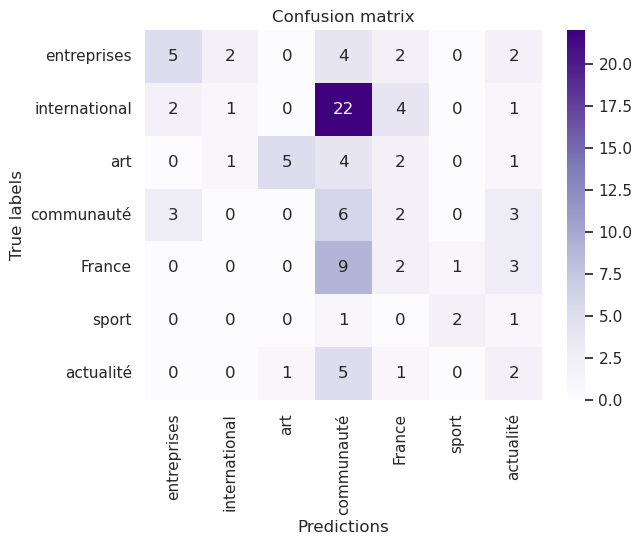

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Rapport de classification
print("\nClassification Report:\n")
print(classification_report(answers, pred_labels, target_names=candidate_labels, zero_division=1))

# Matrice de confusion
cm = confusion_matrix(answers, pred_labels, labels=candidate_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=candidate_labels, yticklabels=candidate_labels)
plt.title("Confusion matrix")
plt.ylabel("True labels")
plt.xlabel("Predictions")
plt.show()

#### With data reconfiguration on 10 articles

In [31]:
data = pd.read_csv("data/LeMonde2003_9classes.csv.gz")

In [32]:
data_reconfig = data.copy()
data_reconfig = data_reconfig[data_reconfig["category"] != "UNE"]
data_reconfig.loc[data_reconfig['category'].isin(['FRA', 'SOC']), 'category'] = 'SOC'

In [33]:
data_reconfig['category'] = data_reconfig['category'].map(dico)
data_reconfig.head()

,text,category
0,a la boutique du fulham fc nichée au dernier é...,sport
1,pour la plupart de ceux qui n'y vivent pas la ...,art
2,la perspective d'une enquête judiciaire sur la...,communauté
3,le tribunal administratif de limoges a annulé ...,communauté
4,des avions américains et britanniques ont bomb...,international


In [43]:
sample = data_reconfig.sample(n=10)
articles = [text[:150] for text in sample["text"].tolist()]
answers = sample["category"].tolist()

candidate_labels = ['entreprises', 'international', 'art', 'communauté', 'sport']

start_time = time.time()
classifier = pipeline(
    "zero-shot-classification", 
    model="symanto/xlm-roberta-base-snli-mnli-anli-xnli",
    tokenizer="symanto/xlm-roberta-base-snli-mnli-anli-xnli"
)
init_time = time.time() - start_time

start_eval = time.time()
results = [classifier(article, candidate_labels) for article in tqdm(articles, desc="Classifying...")]
eval_time = time.time() - start_eval

pred_labels = [r['labels'][0] for r in results]
correct_predictions = sum(1 for pred, true in zip(pred_labels, answers) if pred == true)
accuracy = correct_predictions / len(articles)

print("\nEvaluation on 10 articles :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Evaluation time: {eval_time:.2f} seconds")
print(f"Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli")
print(f"Initialization time : {init_time:.2f} seconds\n")

for i, (article, answer, pred_label) in enumerate(zip(articles, answers, pred_labels)):
    print("*"*180)
    print(f"Article {i+1}: {article}...")
    print(f"True Label: {answer}")
    print(f"Predicted Label : {pred_label}\n")

Device set to use cpu
Classifying...: 100%|██████████| 10/10 [02:11<00:00, 13.15s/it]


Evaluation on 10 articles :
Accuracy : 0.80
Evaluation time: 131.51 seconds
Model : symanto/xlm-roberta-base-snli-mnli-anli-xnli
Initialization time : 1.84 seconds

************************************************************************************************************************************************************************************
Article 1: au 1er étage d'une des allées des gratte-ciel le quartier le plus célèbre de villeurbanne ben inspecte le faux plafond les plaques qui se soulèvent d'...
True Label: communauté
Predicted Label : communauté

************************************************************************************************************************************************************************************
Article 2: les députés ump denis jacquat moselle et françois d'aubert mayenne sont en concurrence pour le poste de rapporteur de la commission d'enquête sur la c...
True Label: communauté
Predicted Label : communauté

************************************

The results are not very conclusive on the basic categories. By retrying on the reconfigured table, combining the "Société" and "France" categories, and filtering the "UNE" articles, which are underrepresented under a too general term, we achieve more relevant results.